# Netflix Data Analysis


Attributes information:

1. Show_id - Unique ID for every Movie / Tv Show<br>
2. Type - Identifier - A Movie or TV Show<br>
3. Title - Title of the Movie / Tv Show<br>
4. Director - Director of the Movie<br>
5. Cast - Actors involved in the movie/show<br>
6. Country - Country where the movie/show was produced<br>
7. Date_added - Date it was added on Netflix<br>
8. Release_year - Actual Release year of the movie/show<br>
9. Rating: TV Rating of the movie/show<br>
10. Duration - Total Duration in minutes or number of seasons<br>
11. Listed_in - Genre<br>
12. Description - The summary description<br>

Importing all packages


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#loading csv file

netflix = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
netflix.shape

(8807, 12)

Dataset is having 8807 contents data with 12 attributes.

In [ ]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Handling Missing data

In [ ]:
netflix.isna().sum()

show_id            0
type               0
title              1
director        1883
cast             495
country          663
date_added         1
release_year       1
rating             1
duration           1
listed_in          1
description        1
dtype: int64

There are lot of missing data in columns `director`, `cast` and `country` as compared to columns `date_added`, `rating` and `duration`.

In [ ]:
# - Updating the missing values to 'NA' for 'director', 'cast' and 'country' columns.

data = netflix.copy()
data[['director', 'cast', 'country']]=netflix.loc[:,['director','cast','country']].fillna('NA')

In [ ]:
# - Filling missing values with mode for columns 'date_added', 'rating' and duration.

data['date_added'].fillna(data['date_added'].mode()[0], inplace=True)
data.rating.fillna(data.rating.mode()[0], inplace=True)

In [ ]:
data.loc[data.rating.str.contains('min'),'duration'] = data.loc[data.rating.str.contains('min'),'rating']
data.loc[data.rating.str.contains('min'), 'rating'] = data.rating.mode()[0]

In [ ]:
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
# - Converting 'date_added' column to datetime and adding new columns.

data.date_added = pd.to_datetime(data.date_added)
data['year_added'] = data.date_added.dt.year
data['month_added'] = data.date_added.dt.month_name()
data['day_added'] = data.date_added.dt.day_name()

# - Converting apropriate columns to category type.

data = data.astype({
    'type':'category',
    'rating':'category'
})

## Analysis and Visualizations

In [ ]:
# - What type of content present in our data and their counts?

ax = data.type.value_counts().plot(kind='bar', rot=0, color=["r","k"])

ax.set_xlabel('Type')
ax.set_ylabel('Number of content')
ax.set_title('Type of content in dataset')
plt.legend()
plt.show()

NameError: ignored

Large number of Movies are added on Netflix as comapred to TV Shows.

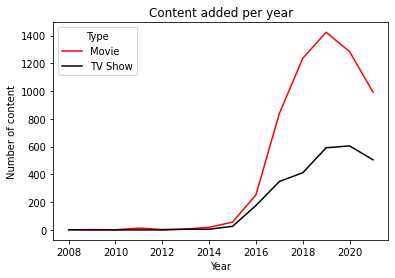

In [ ]:
# - What type of content added on Netflix per year?

df = data.groupby('year_added')['type'].value_counts().reset_index()
df =df.rename(columns={'level_1': 'Type', 'type':'count'})
fig, ax = plt.subplots()

sns.lineplot(x='year_added', y='count', data=df, hue='Type', palette=["r","k"])

ax.set_xlabel('Year')
ax.set_ylabel('Number of content')
ax.set_title('Content added per year')
plt.show()

- After year 2015 alot of content is added on Netflix.
- Movies type content has been added on Netflix at much larger pace than TV Shows.<br>
- There is a significant drop in content addition in both type after 2019 that is because of Covid.


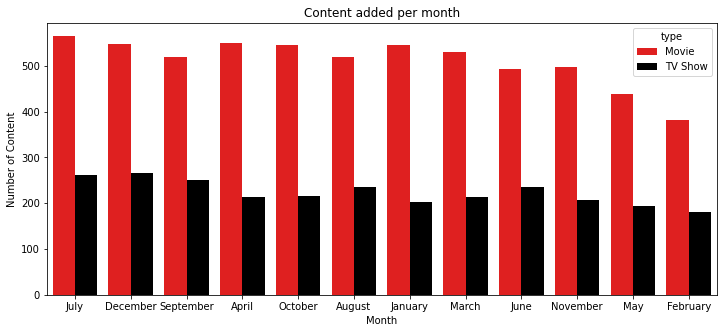

In [ ]:
# - What is the number of content added on Netflix every month?

fig, ax = plt.subplots(figsize=(12, 5))

ax = sns.countplot(x='month_added',
                   data=data, hue='type',
                   order=data.month_added.value_counts().index,
                   palette=["r","k"])

ax.set_xlabel('Month')
ax.set_ylabel('Number of Content')
ax.set_title('Content added per month')
plt.show()

- Number of Movie content added is much higher than TV Show for every month.

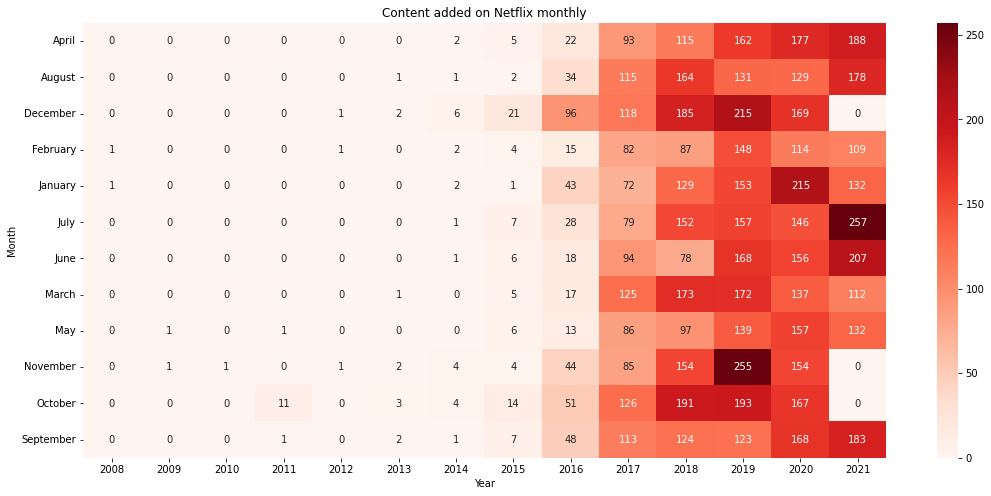

In [ ]:
# - What is the count of content added monthly per year?

year_month_count = (
                    data
                    .loc[:,['year_added', 'month_added']]
                    .value_counts()
                    .reset_index()
                    .rename(columns={0:'count'})
                    .pivot("month_added", "year_added", "count")
                    .fillna(0)
                    .apply(lambda x: x.astype('int'))
                )

plt.figure(figsize=(18,8))
ax = sns.heatmap(year_month_count, annot=True, fmt="d", cmap='Reds')
ax.set_xlabel('Year')
ax.set_ylabel('Month')
ax.set_title('Content added on Netflix monthly')
plt.show()

- Before 2021 content added in July is not very high.
- If we not consider the content added in 2021 as we don't have data for all months then more content is added in `October`, `November` and `December`.
- For year 2021 we don't have data after september.


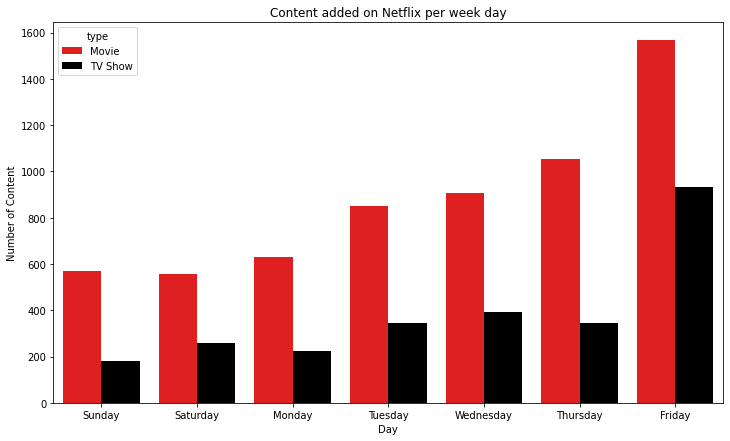

In [ ]:
# - On which week day Netflix added most content?

plt.figure(figsize=(12, 7))
ax = sns.countplot(x='day_added',data=data,
                   hue='type',
                   order=data.day_added.value_counts().sort_values().index,
                   palette=["r","k"])

ax.set_title('Content added per week day')
ax.set_xlabel('Day')
ax.set_ylabel('Number of Content')
ax.set_title('Content added on Netflix per week day')
plt.show()

- Large number of content added on Friday after Thursday.
- Also significant number of TV Show released on Friday than other days.

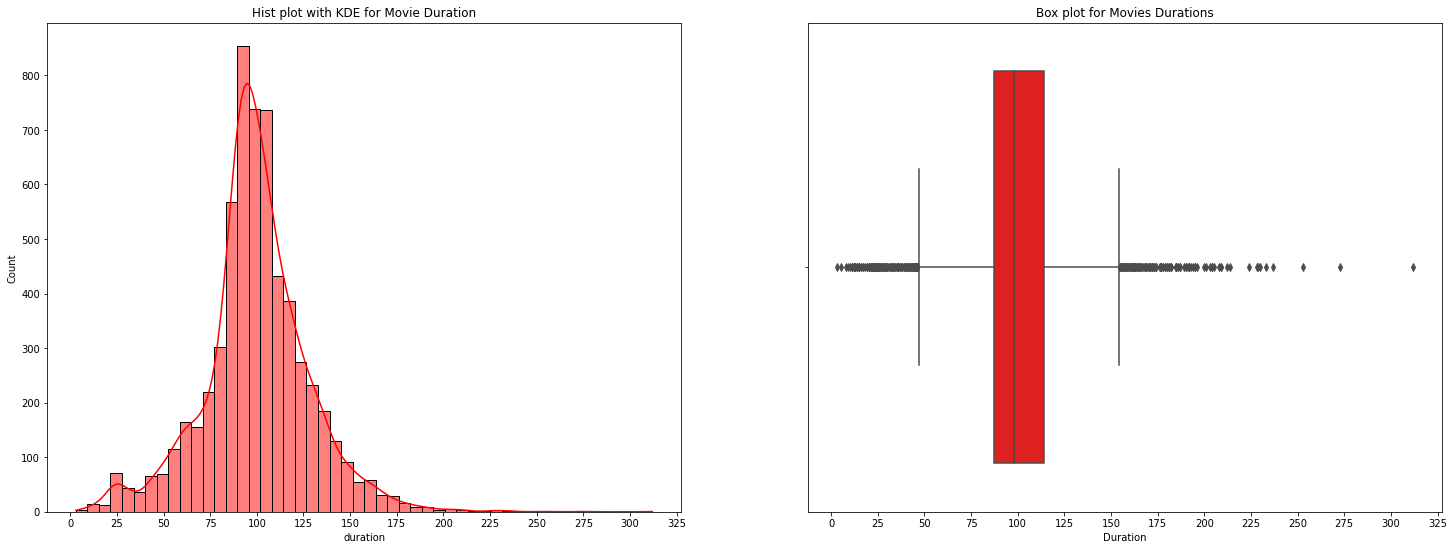

In [ ]:
# - What is the most common durations of Movies?

movie_durations = data[data['duration'].str.contains('min')]['duration'].apply(lambda x: x.split()[0]).astype('int')

# Hist plot with KDE
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,9))
g = sns.histplot(movie_durations, kde=True, color="r", bins=50, ax = ax1)
ax1.set_title('Hist plot with KDE for Movie Duration')
g.set(xticks=np.arange(0, 350, 25))

# Box plot
sns.boxplot(x=movie_durations, color="r", ax = ax2)
ax2.set_xticks(np.arange(0,350, 25))
ax2.set_xlabel('Duration')
ax2.set_title('Box plot for Movies Durations')
plt.show()

- Generally Movies have duration range around 100.
- Also around 25 minutes there is a increase in count that is because of short films.

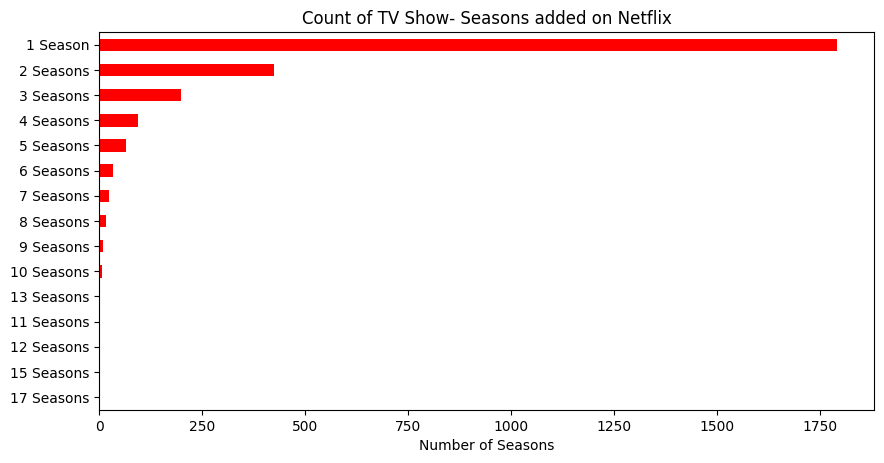

In [ ]:
# - What is the most common number of seasons released on Netflix?

seasons = data[data['duration'].str.contains('Season')]['duration']

plt.figure(figsize=(10,5), dpi=100)
ax = seasons.value_counts().sort_values().plot(y='duration', kind='barh',color=["r"])

ax.set_xlabel('Number of Seasons')
ax.set_title('Count of TV Show- Seasons added on Netflix')
plt.show()

* There is a significant drop of count of seasons after season 1.
* Tv shows are of 1 - 2 Seasons mostly.

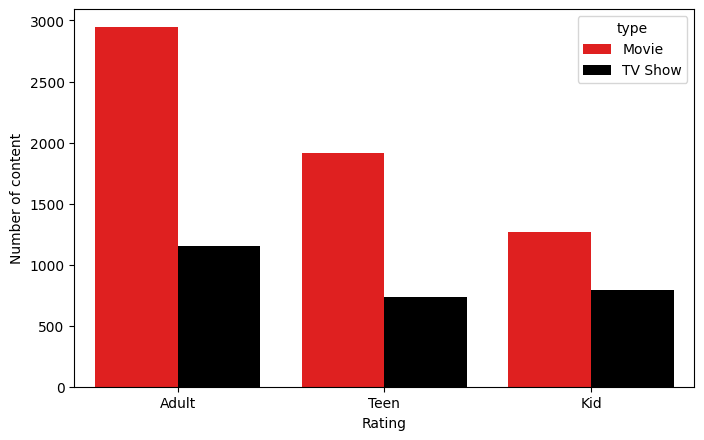

In [ ]:
# - What is the count of content added as per audiance type?

# We are dividing audiance in three types as per rating column
Kids = ['TV-Y', 'TV-Y7', 'G', 'TV-G', 'PG', 'TV-PG', 'TV-Y7-FV']
Teens = ['PG-13', 'TV-14']
Adults = ['R', 'TV-MA', 'NC-17', 'UR', 'NR']

def rate(x):
    if x in Kids:
        return 'Kid'
    elif x in Teens:
        return 'Teen'
    elif x in Adults:
        return 'Adult'

df1 = data['rating'].apply(rate)
df2 = pd.concat([df1, data['type']], axis=1)
plt.figure(figsize=(8,5), dpi=100)
ax = sns.countplot(x='rating',data=df2, hue='type', order=['Adult', 'Teen', 'Kid'], palette=["r","k"])
ax.set_ylabel('Number of content')
ax.set_xlabel('Rating')
plt.show()

* Netflix added alot of adults movies as compare to adult TV shows.
* Adult and Teen content is the most common content on netflix.

In [ ]:
import os
from math import pi
class Rectangle:
  def _init_(self,l,w):
    self.l = l
    self.w = w
  def area(self):
    return (self.l*self.w)

class Circle:
  def _init_(self,r):
    self.r*r
    def area(self):
      return (pi*self.r*self.r)

if _name_ == '_main_':
    fptr = open(os.environ['OUTPUT_PATH'], 'w')
    q = int(input())
    queries = []
    for _ in range(q):
        args = input().split(' ')
        shape_name, params = args[0], map(int, args[1:])
        if shape_name == "rectangle":
            a, b = params[0], params[1]
            shape = Rectangle(a, b)
        elif shape_name == "circle":
            r = params[0]
            shape = Circle(r)
        else:
            raise ValueError("invalid shape type")
        fptr.write("%.2f\n" % shape.area())
    fptr.close()